Questions for Brian:
- Columns:
    - Class Codes: only ['F', 'A', 'DA', 'AC', 'FA', 'DF', '']
        - no CO, DD, FS, OA, etc.
    - "Counters" = cumulative sum?
- Unique building ID instead of MAP_BLK_LOT?
- Inclusive of 1979/1980 or no?
- Whats going on with buildings built in 1985? See RD plot
- Negative relationship between built year and eviction rate on both sides of discontinuity.
- Best way to account for up-conversion, down-conversion, and policy changes?
- Census Tract for RD model params?

In [128]:
import pandas as pd
import os
from matplotlib import pyplot as plt
import seaborn as sns

In [17]:
os.getcwd()

'/Users/max/Documents/cal/evictions'

In [18]:
asr = pd.read_csv('./data/asr_grouped_by_yr_w_fips.csv', dtype={'fipscd': str})

In [20]:
asr.columns

Index(['index', 'asr_yr', 'house_1', 'house_2', 'street_name', 'street_type',
       'total_units', 'uniq_unit_counts', 'min_units', 'uniq_bldg_types',
       'bldg_type_min', 'bldg_type_max', 'uniq_rc_eligibility',
       'any_rc_eligibility', 'uniq_years_built', 'year_built_min',
       'year_built_max', 'uniq_fipscd', 'fipscd', 'ev_count_post_07',
       'ev_count'],
      dtype='object')

In [163]:
asr = asr[asr['total_units'] > 0]

In [169]:
asr['ev_per_unit'] = asr['ev_count_post_07'] / asr['total_units']

In [170]:
asr = asr[asr['any_rc_eligibility'] == 1]

In [171]:
asr['pre_1980'] = (asr['year_built_max'] < 1980)

In [172]:
asr.groupby('pre_1980')['ev_per_unit'].mean()

pre_1980
False    0.004986
True     0.012759
Name: ev_per_unit, dtype: float64

In [ ]:
asr['']

In [186]:
asr.groupby(['house_1','house_2','street_name','street_type','pre_1980'])['total_units'].mean().reset_index().groupby('pre_1980').mean()

,house_1,house_2,total_units
pre_1980,,,
False,-225.987429,1188.626286,11.275531
True,535.014067,1414.029653,4.881550


In [ ]:
asr.groupby('pre_1980')['inde']

In [2]:
df = pd.read_stata("hpd_correction/Eviction_Building_Panel_Gardner_200307to201312_v1.dta")

In [41]:
(df['permit_count'] >= df['rc_permit']).value_counts()

True     4079176
False         12
dtype: int64

initial_rentcontrol
0.0    8.534335
1.0    5.249129
Name: initial_newUNITS, dtype: float64

In [156]:
df[(df['newYRBLT'] >= 1980) & (df['nofault'] > 0)]

,fiscalyear,RP1NBRCDE,MAP_BLK_LOT,year,month,yymm,demolition_yymm,modeRP1CLACDE,LATITUDE,LONGITUDE,...,pol_elliselddis,pol_othernofltminpmt,pol_othernofltmaxpmt,pol_othernofltelddis,totalellisminpmt,totalotherminpmt,total_evic,nofault_per_unit,total_evic_per_unit,atfault_per_unit
698371,2004.0,06C,1081055,2005.0,3.0,200503.0,NaN,F,37.783138,-122.443687,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.5,0.5,0.0


In [53]:
df['initial_rentcontrol'].value_counts()

1.0    3908199
0.0     170977
Name: initial_rentcontrol, dtype: int64

In [60]:
df[df['newYRBLT'] >= 1979]['initial_rentcontrol'].value_counts()

0.0    168690
Name: initial_rentcontrol, dtype: int64

In [68]:
foo = df[(df['newYRBLT'] < 1979) & (df['initial_rentcontrol'] == 0)][['upconversion','MAP_BLK_LOT','modeRP1CLACDE','demolition_yymm','demolished','downconversion','initial_newUNITS']]

In [70]:
foo.sort_values(['upconversion'])

,upconversion,MAP_BLK_LOT,modeRP1CLACDE,demolition_yymm,demolished,downconversion,initial_newUNITS
108,0.0,0091043,F,NaN,0.0,0.0,2.0
2759110,0.0,1225027,A,NaN,0.0,0.0,7.0
2757310,0.0,0091043,F,NaN,0.0,0.0,2.0
2757089,0.0,1239001,A,NaN,0.0,0.0,9.0
2754465,0.0,0822023,A,NaN,0.0,0.0,6.0
...,...,...,...,...,...,...,...
1365629,0.0,1177025,A,NaN,0.0,0.0,18.0
1365865,0.0,0187001,A,NaN,0.0,0.0,15.0
1366303,0.0,3547009,A,NaN,0.0,0.0,52.0
1364020,0.0,3701011,F,NaN,0.0,0.0,3.0


In [198]:
df['total_evic'] = df['atfault'] + df['nofault']

df['nofault_per_unit'] = (df['nofault'] / df['initial_newUNITS'])
df['total_evic_per_unit'] = (df['total_evic'] / df['initial_newUNITS'])
df['atfault_per_unit'] = (df['atfault'] / df['initial_newUNITS'])

df.groupby('initial_rentcontrol').agg(
    {'atfault_per_unit': "mean", "nofault_per_unit": "mean", "total_evic_per_unit": "mean"}) * 12

In [162]:
df['total_evic'].sum()

7812.0

In [205]:
df_year = df.groupby(['MAP_BLK_LOT', 'year', 'newYRBLT', 'initial_newUNITS', 'initial_rentcontrol']).agg(
    {'atfault': "sum", "nofault": "sum", "total_evic": "sum", "month": "count"}
).reset_index().rename(columns={'month':'months_obs'})

In [206]:
df_year

,MAP_BLK_LOT,year,newYRBLT,initial_newUNITS,initial_rentcontrol,atfault,nofault,total_evic,months_obs
0,0024005,2003.0,1906.0,6.0,1.0,0.0,0.0,0.0,6
1,0024005,2004.0,1906.0,6.0,1.0,0.0,0.0,0.0,12
2,0024005,2005.0,1906.0,6.0,1.0,0.0,0.0,0.0,12
3,0024005,2006.0,1906.0,6.0,1.0,0.0,0.0,0.0,12
4,0024005,2007.0,1906.0,6.0,1.0,0.0,0.0,0.0,12
...,...,...,...,...,...,...,...,...,...
358064,7555101,2009.0,1968.0,16.0,1.0,0.0,0.0,0.0,12
358065,7555101,2010.0,1968.0,16.0,1.0,0.0,0.0,0.0,12
358066,7555101,2011.0,1968.0,16.0,1.0,0.0,0.0,0.0,12
358067,7555101,2012.0,1968.0,16.0,1.0,0.0,0.0,0.0,12


In [207]:
df_year['nofault_per_unit'] = (df_year['nofault'] / df_year['initial_newUNITS']) / df_year['months_obs']
df_year['atfault_per_unit'] = (df_year['atfault'] / df_year['initial_newUNITS']) / df_year['months_obs']
df_year['total_evic_per_unit'] = (df_year['total_evic'] / df_year['initial_newUNITS']) / df_year['months_obs']

In [208]:
df_year['nofault_per_unit_per_yr'] = df_year['nofault_per_unit'] * 12
df_year['total_evic_per_unit_per_yr'] = df_year['total_evic_per_unit'] * 12
df_year['atfault_per_unit_per_yr'] = df_year['atfault_per_unit'] * 12

In [212]:
df_year.groupby(['initial_rentcontrol']).agg(
    total_addresses=('MAP_BLK_LOT', 'count'),
    total_units=('initial_newUNITS', 'sum'),
    mean_units_per_address=('initial_newUNITS', 'mean'),
    total_evictions=('total_evic', 'sum'),
    mean_ev_per_unit=('total_evic_per_unit_per_yr', 'mean')
)

,total_addresses,total_units,mean_units_per_address,total_evictions,mean_ev_per_unit
initial_rentcontrol,,,,,
0.0,14974,127638.0,8.523975,100.0,0.002347
1.0,343095,1796465.0,5.236057,7712.0,0.005178


In [204]:
grouped.groupby(['initial_rentcontrol']).agg(
    total_addresses=('MAP_BLK_LOT', 'count'),
    total_units=('initial_newUNITS', 'sum'),
    mean_units_per_address=('initial_newUNITS','mean'),
    total_evictions=('total_evic', 'sum'),
    mean_ev_per_unit=('total_evic_per_unit_per_yr','mean')
)

,total_addresses,total_units,mean_units_per_address,total_evictions,mean_ev_per_unit
initial_rentcontrol,,,,,
0.0,14974,127638.0,8.523975,100.0,0.002347
1.0,343095,1796465.0,5.236057,7712.0,0.005178


In [135]:
rc_pop = grouped[(grouped['newYRBLT'] > 1957) &
    (grouped['newYRBLT'] < 2003) & (grouped['initial_newUNITS'] > 0)]

(1952.0, 2008.0)

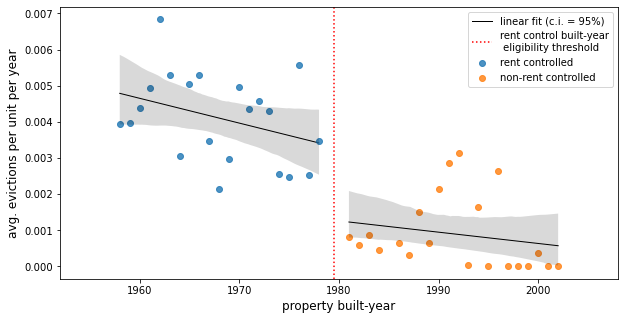

In [215]:
fig, ax = plt.subplots(figsize=(10,5))

yr_vs_ev = rc_pop.groupby('newYRBLT').agg({ev_col: 'mean'}).reset_index()
yr_vs_ev1 = yr_vs_ev[(yr_vs_ev['newYRBLT'] < 1979) & (yr_vs_ev['newYRBLT'] >= 1953)]
yr_vs_ev2 = yr_vs_ev[(yr_vs_ev['newYRBLT'] > 1980) & (yr_vs_ev['newYRBLT'] <= 2007)
                     & (yr_vs_ev['newYRBLT'] != 1985)  # 1985 is weirdly high outlier
                    ]
sns.regplot(
    x='newYRBLT', y='total_evic_per_unit_per_yr', data=yr_vs_ev1, ax=ax, truncate=True,
    label='rent controlled', line_kws={'color':'k', 'lw':1, 'label':'linear fit (c.i. = 95%)', 'zorder': 0})
sns.regplot(
    x='newYRBLT', y='total_evic_per_unit_per_yr', data=yr_vs_ev2, ax=ax, truncate=True,
    label='non-rent controlled', line_kws={'color':'k', 'lw':'1',  'zorder': 0})
ax.axvline(1979.5, ls=':', c='r', label='rent control built-year\n eligibility threshold')
ax.legend()
_ = ax.set_xlabel("property built-year", fontsize=12)
_ = ax.set_ylabel("avg. evictions per unit per year", fontsize=12,
#                   rotation=0,
#                   labelpad=70
                 )
# _ = ax.set_title("SF Eviction Rates (2007-2016)\nfor Multi-family Residential Addresses", fontsize=20)
# ax.set_ylim((-0.005, 0.05))
ax.set_xlim((1952, 2008))

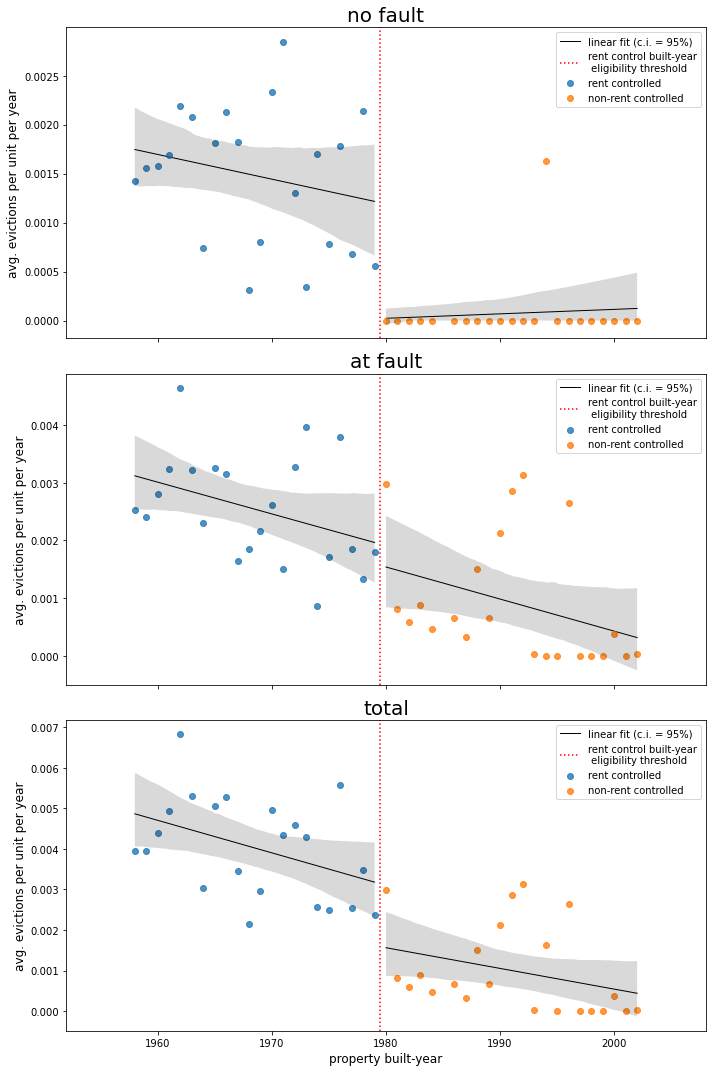

In [157]:
fig, axarr = plt.subplots(3,1,figsize=(10,15), sharex=True)
ev_cols = ['nofault_per_unit_per_yr', 'atfault_per_unit_per_yr', 'total_evic_per_unit_per_yr']
titles = ['no fault', 'at fault', 'total']
for i, ev_col in enumerate(ev_cols):
    ax = axarr[i]
    yr_vs_ev = rc_pop.groupby('newYRBLT').agg({ev_col: 'mean'}).reset_index()
    yr_vs_ev1 = yr_vs_ev[(yr_vs_ev['newYRBLT'] < 1980) &
                         (yr_vs_ev['newYRBLT'] >= 1953)]
    yr_vs_ev2 = yr_vs_ev[(yr_vs_ev['newYRBLT'] >= 1980) &
                         (yr_vs_ev['newYRBLT'] <= 2007)
                         & (yr_vs_ev['newYRBLT'] != 1985)  # 1985 is weirdly high outlier
                        ]

    sns.regplot(
        x='newYRBLT', y=ev_col, data=yr_vs_ev1, ax=ax, truncate=True,
        label='rent controlled', line_kws={'color':'k', 'lw':1, 'label':'linear fit (c.i. = 95%)', 'zorder': 0})
    sns.regplot(
        x='newYRBLT', y=ev_col, data=yr_vs_ev2, ax=ax, truncate=True,
        label='non-rent controlled', line_kws={'color':'k', 'lw':'1',  'zorder': 0})
    ax.axvline(1979.5, ls=':', c='r', label='rent control built-year\n eligibility threshold')
    ax.legend()
    ax.set_xlabel("")
    if i == len(titles) - 1:
        _ = ax.set_xlabel("property built-year", fontsize=12)
    _ = ax.set_ylabel("avg. evictions per unit per year", fontsize=12)
    _ = ax.set_title(titles[i], fontsize=20)
    # ax.set_ylim((-0.005, 0.05))
    ax.set_xlim((1952, 2008))
    
fig.tight_layout()

In [40]:
for col in df.columns:
    print(col)

fiscalyear
RP1NBRCDE
MAP_BLK_LOT
year
month
yymm
demolition_yymm
modeRP1CLACDE
LATITUDE
LONGITUDE
lottery_units
lottery_winner
lottery_year
lottery_win_year
lottery_win_yymm
lottery_month
lottery_participant
newYRBLT
counter1
counter2
counter3
counter4
counter5
counter6
counter7
counter8
counter9
counter10
counter11
counter12
counter13
counter14
counter15
counter16
counter19
atfault
nofault
permit_count
demolished
demolition_filed
upconversion
downconversion
initial_newUNITS
rc_permit
pol20
pol22
pol23
pol24
pol27
pol28
pol29
pol30
pol33
pol34
pol_suspendcondocnvers
pol_ellisamt_lowincome
pol_ellisamt_min
pol_ellisamt_max
pol_ellisamt_elddisabled
pol_othnofltamt_min
pol_othnofltamt_max
pol_othnofltamt_specten
stata_yymm
BLK_LOT_ID
NBR_ID
initial_rentcontrol
rc3ANYCOMPANY_RENT
rc_atfault
rc_counter8
rc_counter9
rc_counter10
rc_counter12
rc_counter13
rc_nofault
pol_ellislowincpmt
pol_ellisminpmt
pol_ellismaxpmt
pol_elliselddis
pol_othernofltminpmt
pol_othernofltmaxpmt
pol_othernofltelddi

In [4]:
df.shape

(4079188, 83)

In [11]:
df[[col for col in df.columns if 'counter' in col]].describe()

,counter1,counter2,counter3,counter4,counter5,counter6,counter7,counter8,counter9,counter10,...,counter13,counter14,counter15,counter16,counter19,rc_counter8,rc_counter9,rc_counter10,rc_counter12,rc_counter13
count,4.079176e+06,4.079176e+06,4.079176e+06,4.079176e+06,4.079176e+06,4.079176e+06,4.079176e+06,4.079176e+06,4.079176e+06,4.079176e+06,...,4.079176e+06,4.079176e+06,4.079176e+06,4.079176e+06,4.079176e+06,4.079176e+06,4.079176e+06,4.079176e+06,4.079176e+06,4.079176e+06
mean,2.189168e-04,5.844318e-04,3.407551e-04,2.451475e-05,3.432066e-06,1.789577e-05,5.760967e-05,2.429412e-04,1.225738e-06,2.574049e-05,...,3.194273e-04,1.225738e-06,2.451475e-07,2.451475e-07,2.843712e-05,2.284775e-04,1.225738e-06,2.132784e-05,9.805902e-07,1.061489e-04
std,1.758076e-02,3.686797e-02,1.980202e-02,9.951836e-03,1.980492e-03,5.024926e-03,8.210498e-03,1.656083e-02,1.107130e-03,7.327118e-03,...,3.885566e-02,1.107130e-03,4.951238e-04,4.951238e-04,5.900013e-03,1.511375e-02,1.107130e-03,4.618158e-03,9.902472e-04,1.030231e-02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,8.000000e+00,2.800000e+01,4.000000e+00,1.400000e+01,2.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,1.000000e+00,8.000000e+00,...,1.800000e+01,1.000000e+00,1.000000e+00,1.000000e+00,4.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [21]:
df[['atfault','nofault','rc_atfault','rc_nofault','initial_newUNITS']].describe()

,atfault,nofault,rc_atfault,rc_nofault,initial_newUNITS
count,4.079176e+06,4.079176e+06,4.079176e+06,4.079176e+06,4.079176e+06
mean,1.247556e-03,6.675368e-04,9.634299e-04,3.343813e-04,5.386827e+00
std,5.238647e-02,4.520885e-02,3.102421e-02,1.828304e-02,1.372945e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00
75%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.000000e+00
max,3.000000e+01,1.800000e+01,1.000000e+00,1.000000e+00,7.200000e+02


In [37]:
df.groupby('modeRP1CLACDE')['initial_rentcontrol'].sum()

modeRP1CLACDE
            0.0
A     1492421.0
AC      21979.0
DA      32292.0
DF       1536.0
F     2357924.0
FA       2047.0
Name: initial_rentcontrol, dtype: float64

In [39]:
df['modeRP1CLACDE'].unique().tolist()

['F', 'A', 'DA', 'AC', 'FA', 'DF', '']

In [ ]:
df[['RP1NBRC']]

In [25]:
codes = pd.read_csv('./data/Reference__Assessor-Recorder_Property_Class_Codes.csv')
code_dict = dict(zip(codes['Class Code'], codes['Use Code']))
rc_dict = dict(zip(codes['Class Code'], codes['rc_eligible']))  

In [ ]:
asr['use_code'] = asr['RP1CLACDE'].map(code_dict)
asr['rc_eligible'] = asr['RP1CLACDE'].map(rc_dict)

In [34]:
codes[codes['Class Code'].isin(df['modeRP1CLACDE'].unique().tolist())]

,Use Code,Use Definition,Class Code,Class Definition,rc_eligible
7,COMM,Commercial Misc,AC,Apartmnt & Commercial Store,0
73,MRES,Multi-Family Residential,A,Apartment,1
77,MRES,Multi-Family Residential,DA,Dwellings - Apartments,1
85,MRES,Multi-Family Residential,DF,1 Flat & Dwelling-1 Parcel,1
86,MRES,Multi-Family Residential,F,Flats & Duplex,1
90,MRES,Multi-Family Residential,FA,1 Flat & 1 Apt Bldg-1 Parcel,1


In [5]:
df.colum

33525

Most MAP_BLK_LOT have 12 years of data

In [7]:
df.groupby(['MAP_BLK_LOT','year'])['RP1NBRCDE'].count().value_counts()

12    322239
6      35257
1        538
11         6
9          6
4          6
5          5
3          4
7          3
2          3
10         2
Name: RP1NBRCDE, dtype: int64